In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from dateutil.parser import parse
%matplotlib inline


In [2]:
os.getcwd()

'C:\\Users\\USER\\Desktop\\Python Course'

In [8]:
#importing data for time series and parsing the date column as a date field
#data was collected from WHO database on 13-01-2021
data= pd.read_csv('owid-covid-data.csv', parse_dates=['date'])

In [12]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [6]:
#To show the columns in the data frame
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred',
       'new_vaccinations_smoothed_per_mil

In [14]:
#To drop data not needed in the dataframe
data.drop(['iso_code', 'continent','new_cases_smoothed', 
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred',
       'new_vaccinations_smoothed_per_million', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'], axis=1, inplace=True)

In [15]:
data.head()

,location,date,total_cases,new_cases,total_deaths,new_deaths
0,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN
1,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN
2,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN
3,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN
4,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN


In [16]:
#To filter data for Nigeria only
data=data[data.location=='Nigeria']

In [17]:
data.head()

,location,date,total_cases,new_cases,total_deaths,new_deaths
39210,Nigeria,2020-02-28,1.0,1.0,NaN,NaN
39211,Nigeria,2020-02-29,1.0,0.0,NaN,NaN
39212,Nigeria,2020-03-01,1.0,0.0,NaN,NaN
39213,Nigeria,2020-03-02,1.0,0.0,NaN,NaN
39214,Nigeria,2020-03-03,1.0,0.0,NaN,NaN


In [18]:
#To fill the empty spaces
data.fillna(0,inplace=True)

In [19]:
data.head()

,location,date,total_cases,new_cases,total_deaths,new_deaths
39210,Nigeria,2020-02-28,1.0,1.0,0.0,0.0
39211,Nigeria,2020-02-29,1.0,0.0,0.0,0.0
39212,Nigeria,2020-03-01,1.0,0.0,0.0,0.0
39213,Nigeria,2020-03-02,1.0,0.0,0.0,0.0
39214,Nigeria,2020-03-03,1.0,0.0,0.0,0.0


In [20]:
#To set date as the index
data=data.set_index('date')


In [21]:
data.head()

,location,total_cases,new_cases,total_deaths,new_deaths
date,,,,,
2020-02-28,Nigeria,1.0,1.0,0.0,0.0
2020-02-29,Nigeria,1.0,0.0,0.0,0.0
2020-03-01,Nigeria,1.0,0.0,0.0,0.0
2020-03-02,Nigeria,1.0,0.0,0.0,0.0
2020-03-03,Nigeria,1.0,0.0,0.0,0.0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 321 entries, 2020-02-28 to 2021-01-13
Data columns (total 5 columns):
location        321 non-null object
total_cases     321 non-null float64
new_cases       321 non-null float64
total_deaths    321 non-null float64
new_deaths      321 non-null float64
dtypes: float64(4), object(1)
memory usage: 15.0+ KB


TIME SERIES FOR NEW CASES OF COVID-19 IN NIGERIA

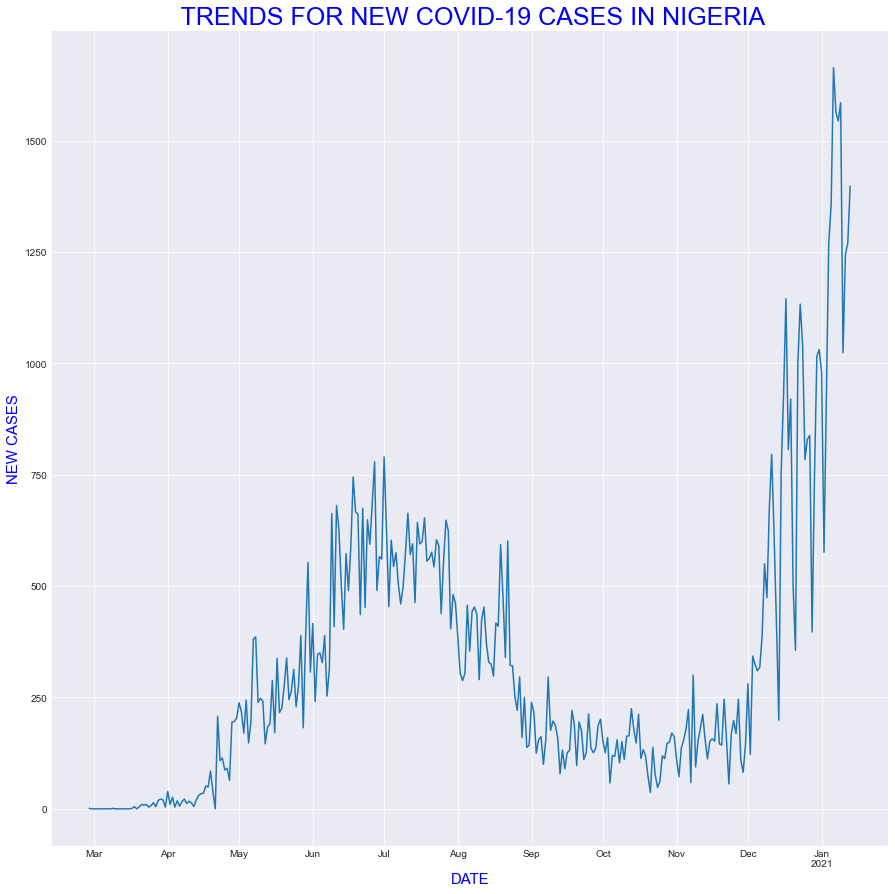

In [83]:
data['new_cases'].plot(figsize=(15,15))
sns.set_style('darkgrid')
plt.title(" TRENDS FOR NEW COVID-19 CASES IN NIGERIA",color='blue',fontsize=25)
plt.ylabel('NEW CASES',fontsize=15,color='blue')
plt.xlabel('DATE',fontsize=15,color='blue')
plt.show()


TIME SERIES FOR DEATH CASES OF COVID-19 IN NIGERIA

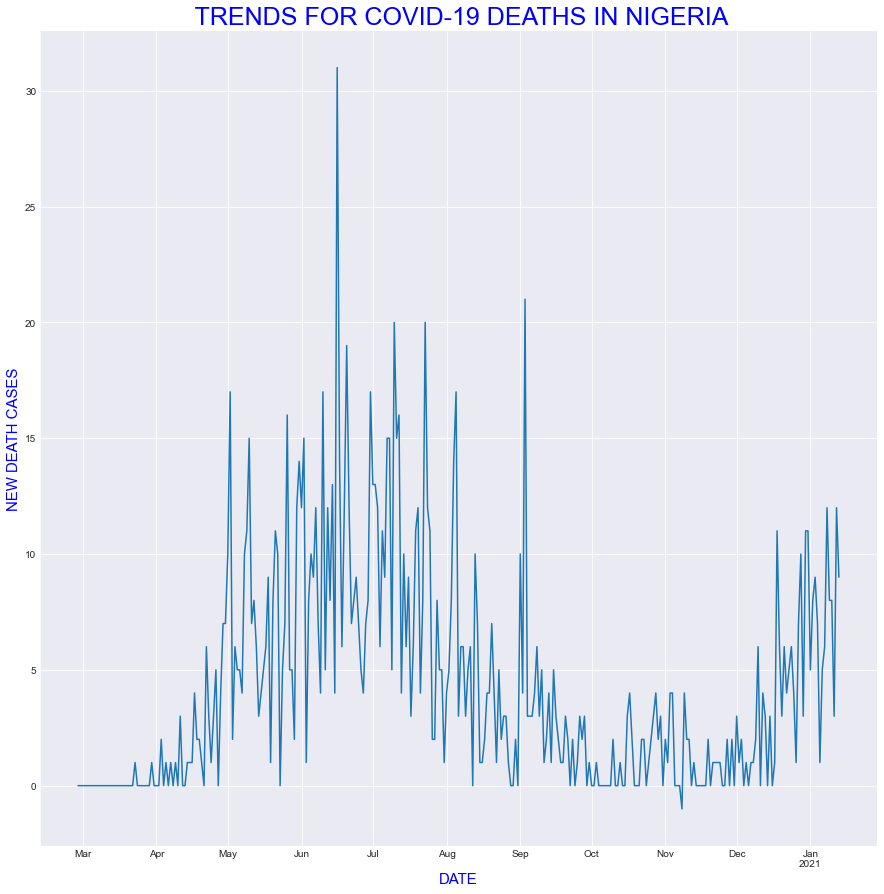

In [82]:
data['new_deaths'].plot(figsize=(15,15))
sns.set_style('darkgrid')
plt.title(" TRENDS FOR COVID-19 DEATHS IN NIGERIA",color='blue',fontsize=25)
plt.ylabel('NEW DEATH CASES',fontsize=15,color='blue')
plt.xlabel('DATE',fontsize=15,color='blue')
plt.show()

TIME SERIES FOR TOTAL CASES OF COVID-19 IN NIGERIA

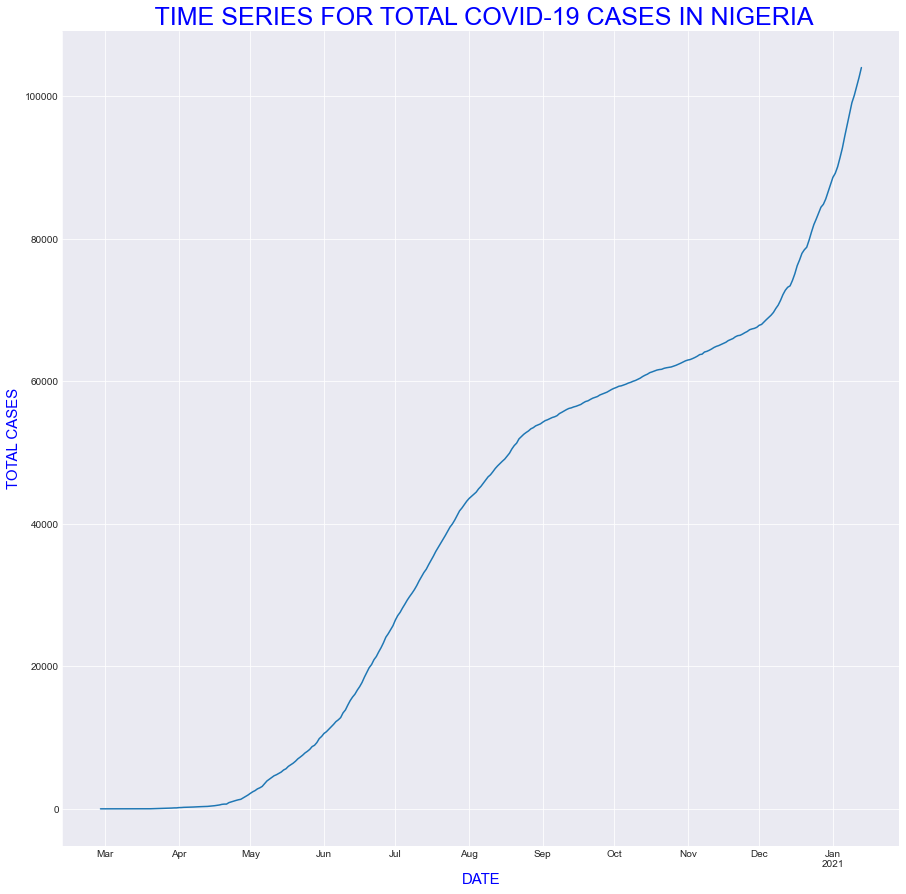

In [23]:
data['total_cases'].plot(figsize=(15,15))
sns.set_style('darkgrid')
plt.title(" TIME SERIES FOR TOTAL COVID-19 CASES IN NIGERIA",color='blue',fontsize=25)
plt.ylabel('TOTAL CASES',fontsize=15,color='blue')
plt.xlabel('DATE',fontsize=15,color='blue')
plt.show()

TIME SERIES FOR TOTAL DEATH CASES OF COVID-19 IN NIGERIA

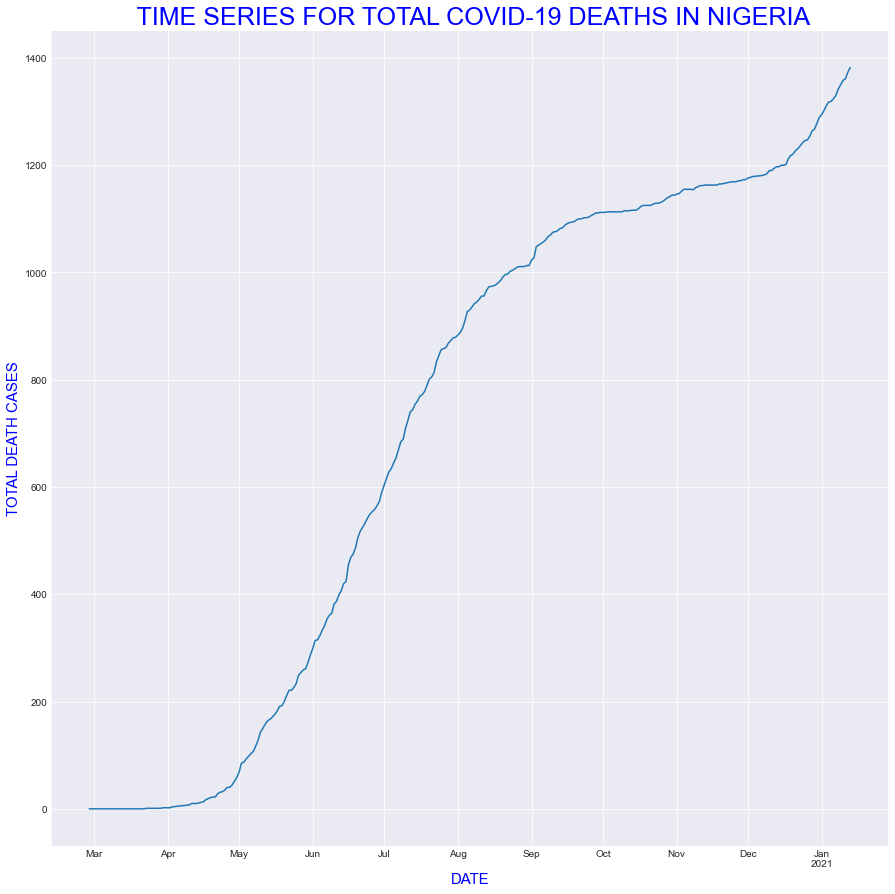

In [81]:
data['total_deaths'].plot(figsize=(15,15))
sns.set_style('darkgrid')
plt.title(" TIME SERIES FOR TOTAL COVID-19 DEATHS IN NIGERIA",color='blue',fontsize=25)
plt.ylabel('TOTAL DEATH CASES',fontsize=15,color='blue')
plt.xlabel('DATE',fontsize=15,color='blue')
plt.show()
